<a href="https://colab.research.google.com/github/ctescuadra/dataanalysisfinals/blob/main/dataanalysisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
dataanalysisproject3= pd.read_csv(
    "/content/dataanalysisproject3.csv",
    names=["wellbeing", "math"])

dataanalysisproject3.head()

,wellbeing,math
0,17.83,430.4241
1,17.83,472.4336
2,17.83,468.1342
3,17.83,493.6951
4,17.83,542.2158


In [ ]:
dataset = dataanalysisproject3.copy()
dataset.tail()

,wellbeing,math
15815,0.003667,422.2095
15816,0.000333,462.0134
15817,0.000333,480.6752
15818,0.000333,542.7359
15819,0.000333,428.9259


In [ ]:
dataset.isna().sum()

wellbeing    0
math         0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

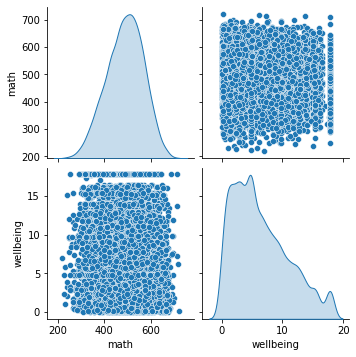

In [ ]:
sns.pairplot(train_dataset[['math','wellbeing']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wellbeing,12656.0,6.424728,4.590899,0.000333,2.829667,5.276333,9.450417,17.8300
math,12656.0,487.919767,79.282478,218.617200,433.628250,492.536050,545.313825,720.8308


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('math')
test_labels = test_features.pop('math')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
wellbeing,6.424728,4.590899
math,487.919767,79.282478


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[6.425]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[4.8]]

Normalized: [[-0.35]]


In [ ]:
wellbeing = np.array(train_features['wellbeing'])

wellbeing_normalizer = layers.Normalization(input_shape=[1,], axis=None)
wellbeing_normalizer.adapt(wellbeing)

In [ ]:
wellbeing_model = tf.keras.Sequential([
   wellbeing_normalizer,
    layers.Dense(units=1)
])

wellbeing_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_35 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
wellbeing_model.predict(wellbeing[:10])

1/1 [==============================] - 0s 56ms/step


array([[-0.117],
       [-0.117],
       [-0.424],
       [-0.3  ],
       [ 0.437],
       [-0.36 ],
       [ 0.523],
       [ 0.112],
       [-0.293],
       [ 0.06 ]], dtype=float32)

In [ ]:
wellbeing_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = wellbeing_model.fit(
    train_features['wellbeing'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 55.2 s, sys: 3.62 s, total: 58.8 s
Wall time: 50.9 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,64.161537,63.097588,95
96,64.155640,63.111195,96
97,64.158455,63.102104,97
98,64.160202,63.101734,98
99,64.158333,63.088898,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.xlabel('Epoch')
  plt.ylabel('Error [math]')
  plt.legend()
  plt.grid(True)

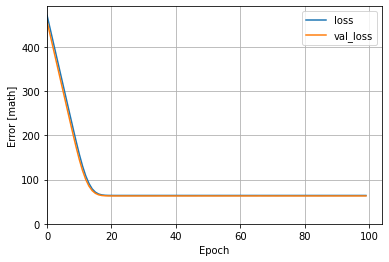

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['wellbeing_model'] = wellbeing_model.evaluate(
    test_features['wellbeing'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0, 200, 400)
y = wellbeing_model.predict(x)

13/13 [==============================] - 0s 2ms/step


In [ ]:
def plot_wellbeing(x, y):
  plt.scatter(train_features['wellbeing'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('wellbeing')
  plt.ylabel('math')
  plt.ylim([0,max(plt.ylim())])
  plt.xlim([0,30])
  plt.legend()
  plt.grid(True)

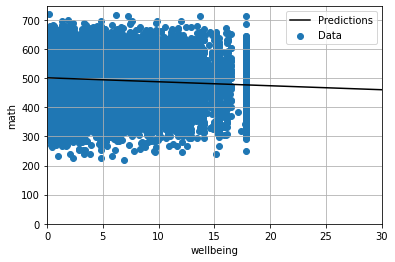

In [ ]:
plot_wellbeing(x, y)

In [ ]:
#DNN
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_wellbeing_model = build_and_compile_model(wellbeing_normalizer)

In [ ]:
dnn_wellbeing_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_36 (Dense)            (None, 64)                128       
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_wellbeing_model.fit(
    train_features['wellbeing'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 10s, sys: 4.52 s, total: 1min 15s
Wall time: 1min 22s


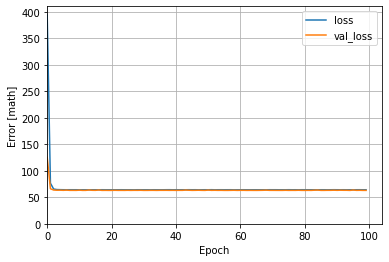

In [ ]:
plot_loss(history)

In [ ]:

y = dnn_wellbeing_model.predict(x)


13/13 [==============================] - 0s 3ms/step


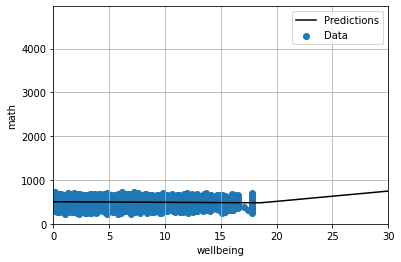

In [ ]:
plot_wellbeing(x, y)

In [ ]:
test_results['dnn_wellbeing_model'] = dnn_wellbeing_model.evaluate(
    test_features['wellbeing'], test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [math]']).T

,Mean absolute error [math]
wellbeing_model,64.751305
dnn_wellbeing_model,64.786140


99/99 [==============================] - 0s 1ms/step


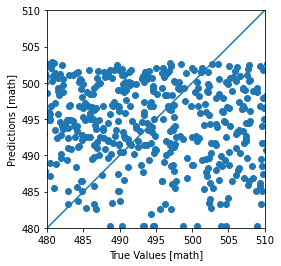

In [ ]:
test_predictions = dnn_wellbeing_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [math]')
plt.ylabel('Predictions [math]')
lims = [480, 510]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

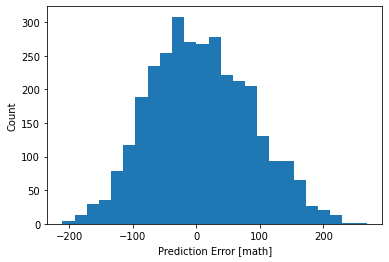

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [math]')
_ = plt.ylabel('Count')

In [ ]:
dnn_wellbeing_model.save('dnn_model')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [math]']).T

,Mean absolute error [math]
wellbeing_model,64.751305
dnn_wellbeing_model,64.786140
reloaded,64.786140
